# **Distance Predictor Part SHAP**
Author: Declan Costello

Date: 10/8/2023

## **Part SHAP Description**

Here I measure how much each feature (such as launch angle, launch speed, is_barrel, etc.) contributes to the model's prediction

## **Table of Context**

1. [Installation](#Installation)
2. Waterfall Plot
3. Bar Plots
4. Bias Plots
5. HeatMap
6. Scatter PLots
7. Bee Swarm Plot
8. Summary Plot
9. Decision Plot
10. Force Plot

**Installation**

The following installs the necessary packages

In [1]:
import shap
import pandas as pd
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


**Data Import**

In [2]:
data = pd.read_csv('FE_data.csv')

**Train Test Split**

In [3]:
feature_cols = ['launch_angle','launch_speed','pfx_x','pfx_z',"release_speed","domed", "spray_angle",'is_barrel','Pop','pull_percent']
X = data.loc[:, feature_cols]

target_cols = ['hit_distance_sc']
y = data.loc[:, target_cols]

X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.95, test_size=0.05,random_state=0)

ter_xg = XGBRegressor(XGB__learning_rate=0.1, max_depth=5, min_child_weight = 1, subsample = 1.0, n_estimators=10).fit(X_train, y_train.values.ravel())

explainer = shap.TreeExplainer(ter_xg, DMatrix=True)

shap_values = explainer(X_valid)

shap.initjs()

[18:16:42] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "XGB__learning_rate" } are not used.



**Waterfall**

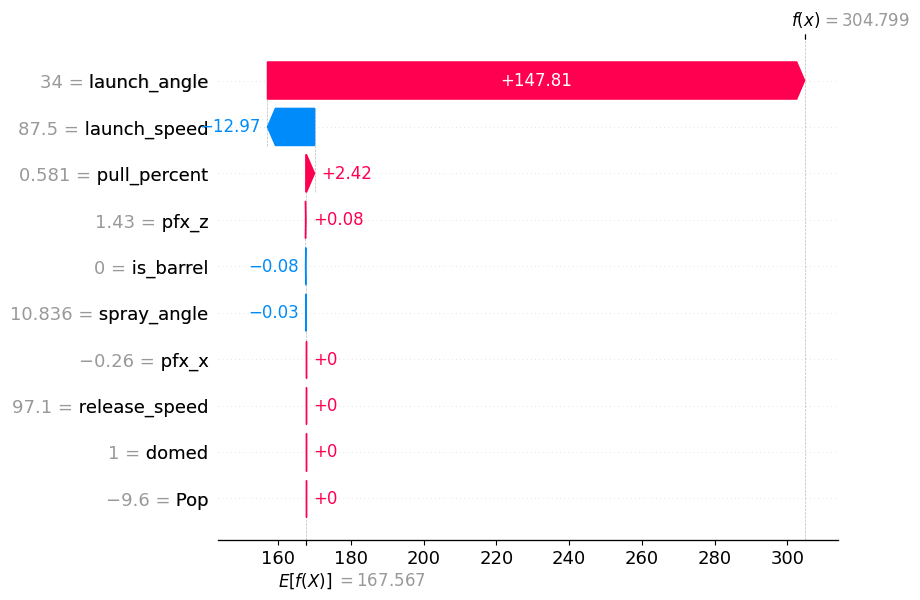

None


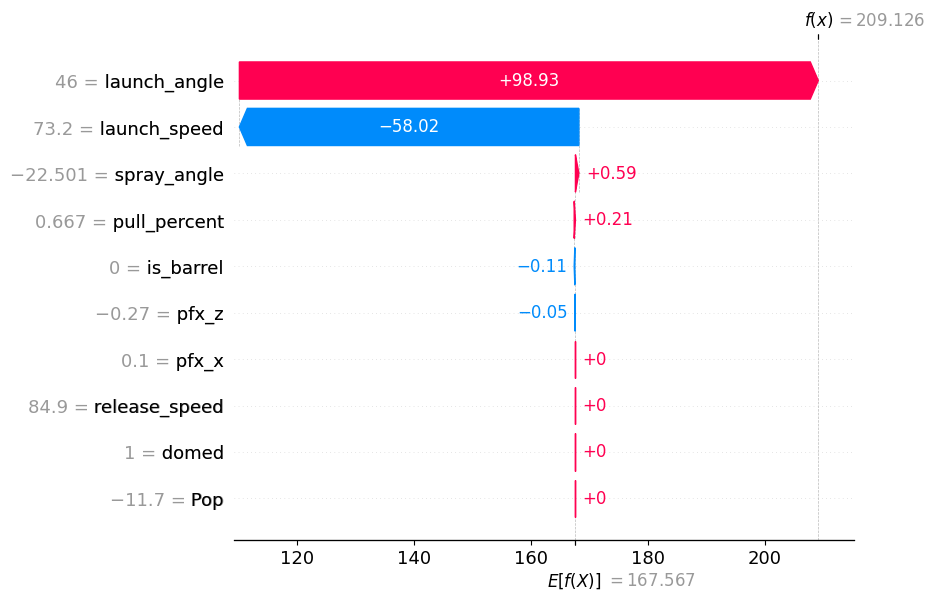

None


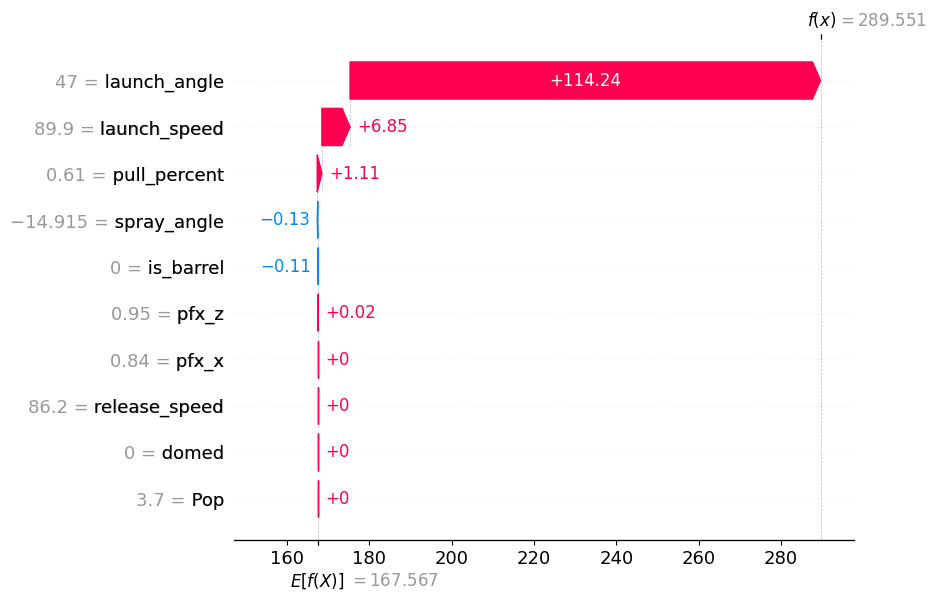

None


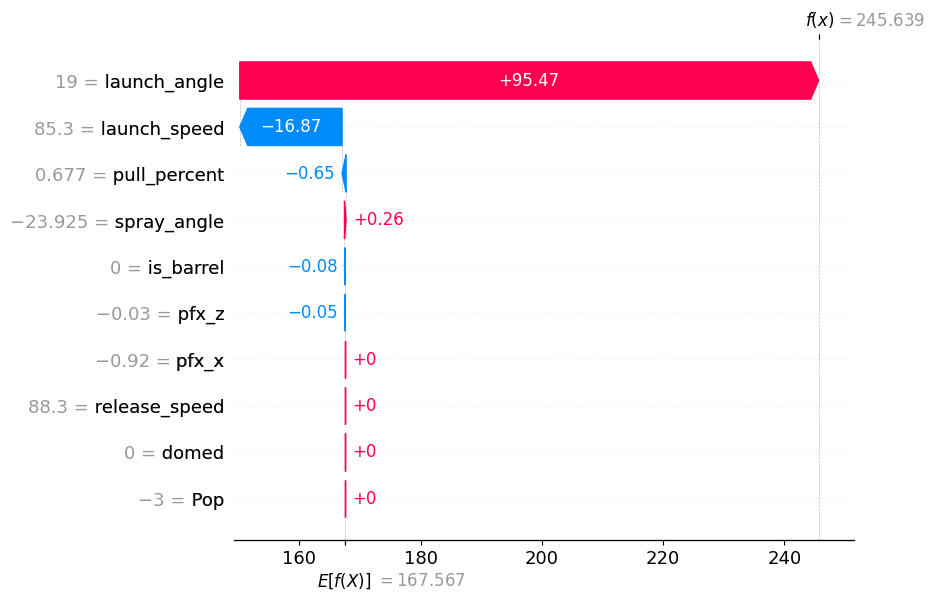

None


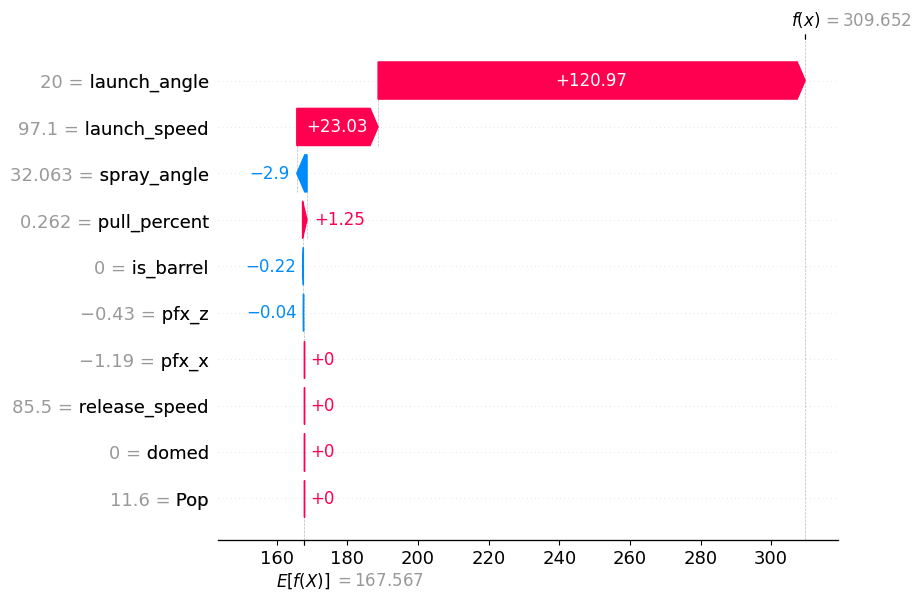

None


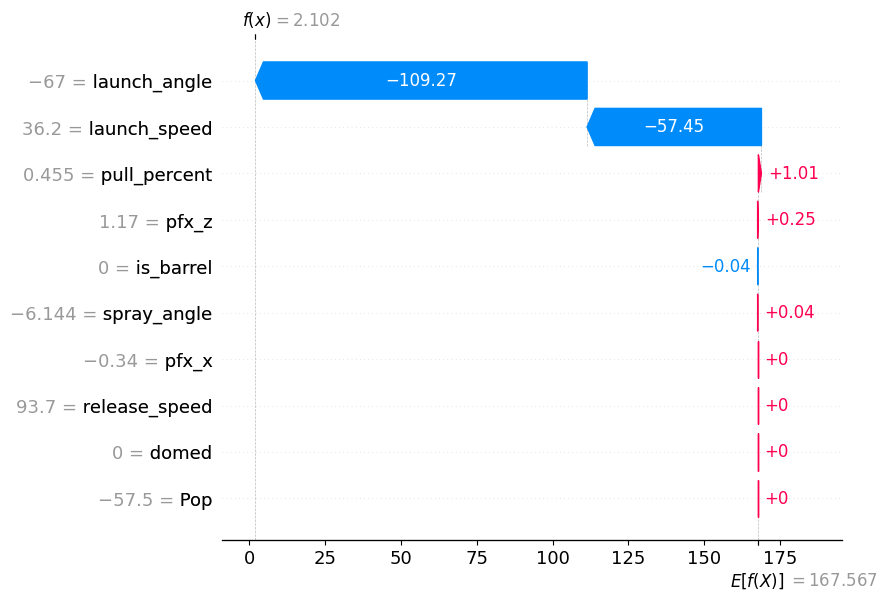

None


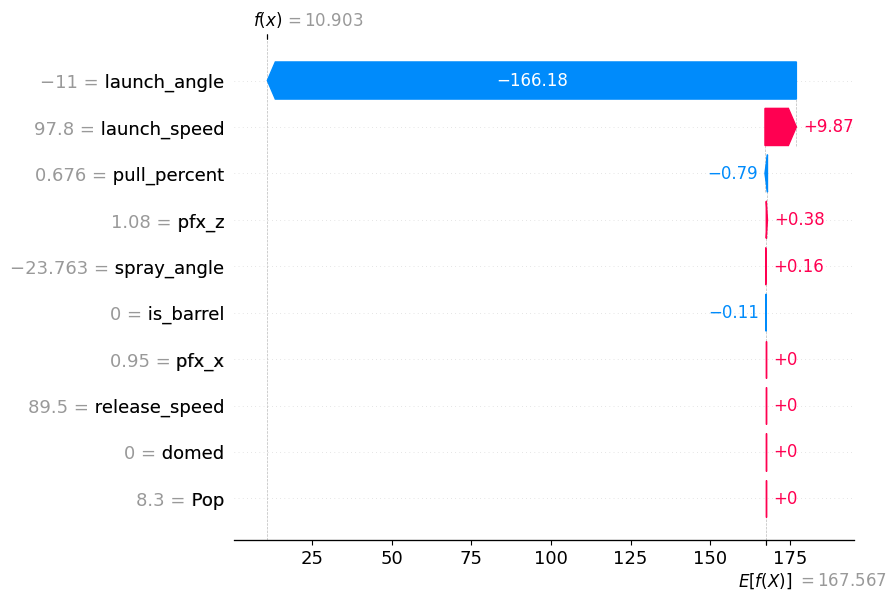

None


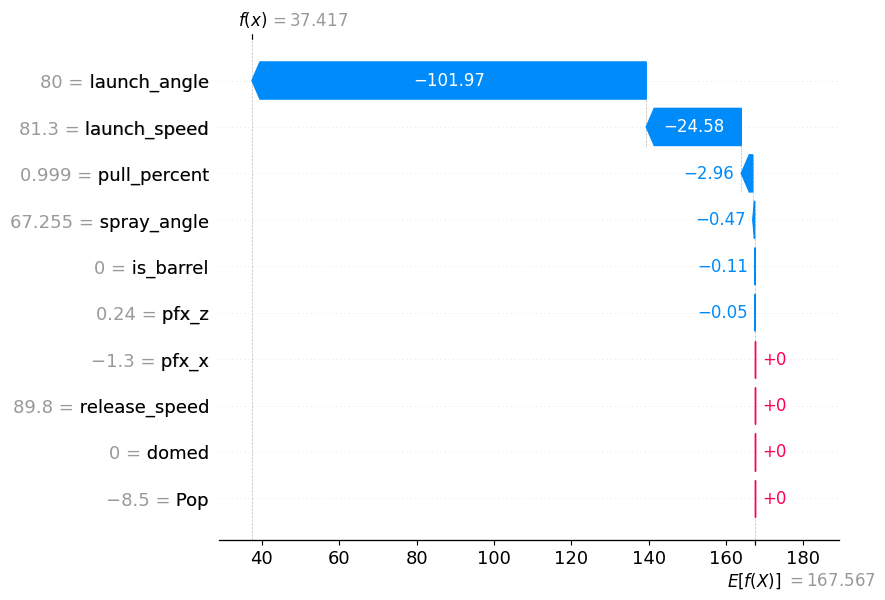

None


In [4]:
for i in range(0, 8):
    print(shap.plots.waterfall(shap_values[i]))

**Bar Plot**

- Magnitude of features accroding to model

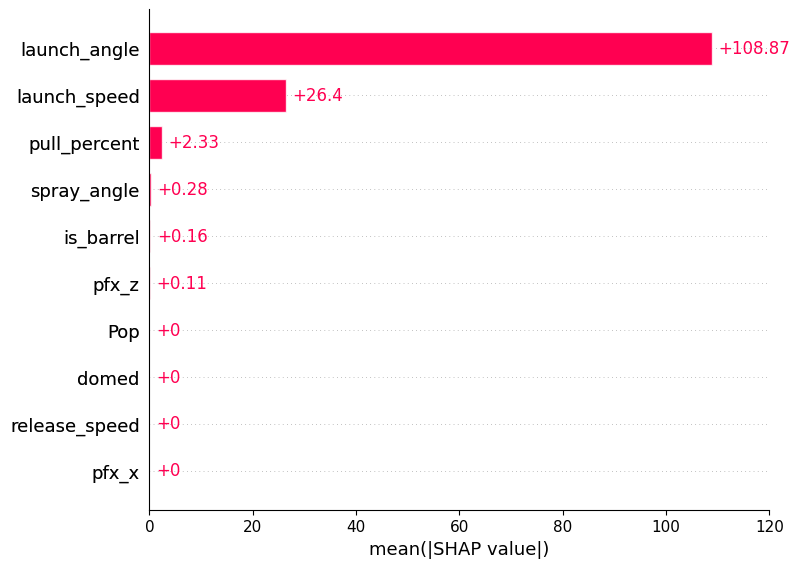

In [5]:
shap.plots.bar(shap_values)

**Is_Barrel Bias**

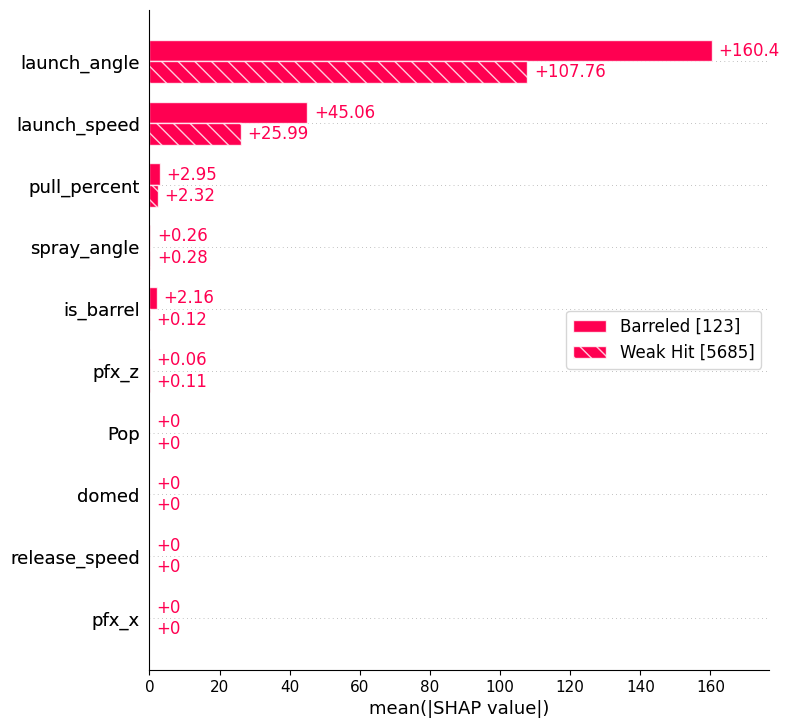

In [6]:
is_barrel = (
    X_valid['is_barrel']
    .apply(lambda is_barrel: 'Barreled' if is_barrel == 1 else 'Weak Hit')
    .values
)
shap.plots.bar(shap_values.cohorts(is_barrel).abs.mean(axis=0))

**Dome Bias**

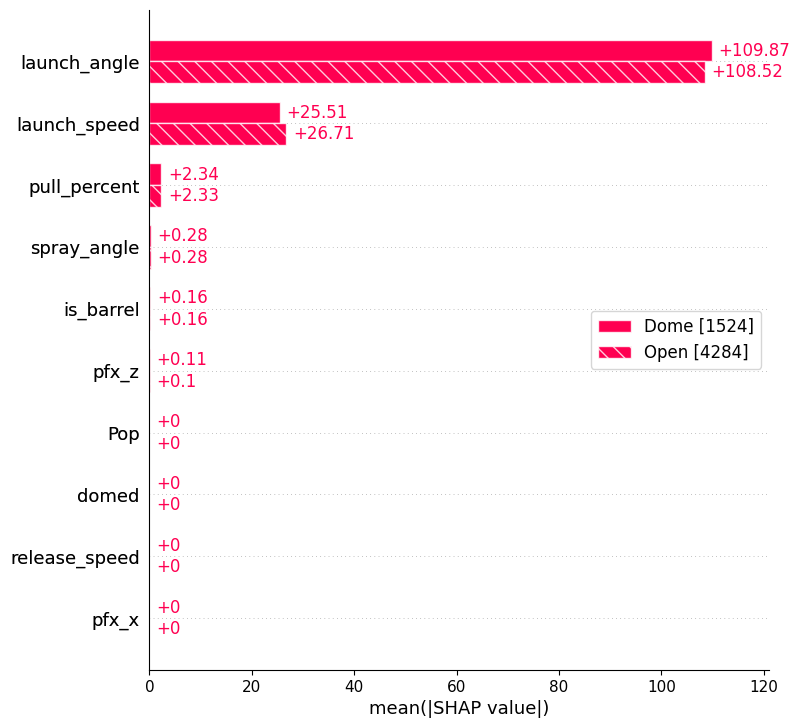

In [7]:
domed = (
    X_valid['domed']
    .apply(lambda domed: 'Dome' if domed == 1 else 'Open')
    .values
)
shap.plots.bar(shap_values.cohorts(domed).abs.mean(axis=0))

**HeatMap**

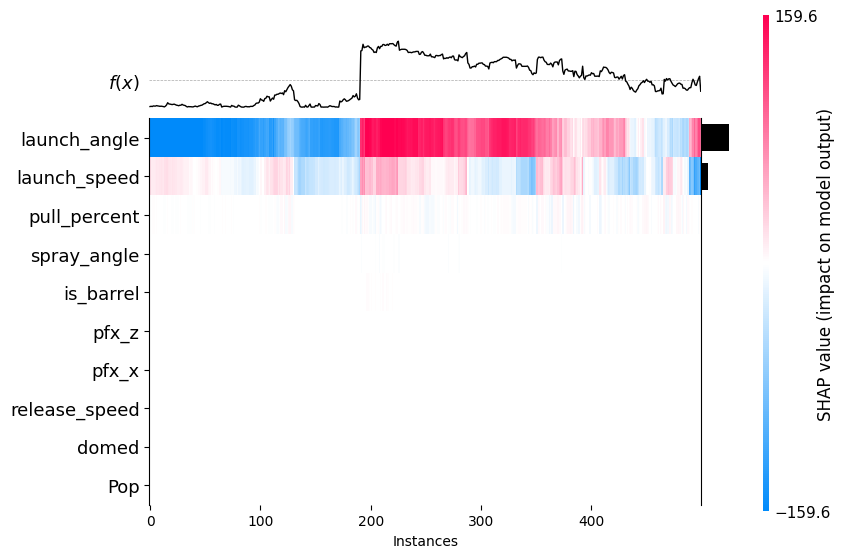

In [8]:
shap.plots.heatmap(shap_values[:500])

**Scatter Plots**

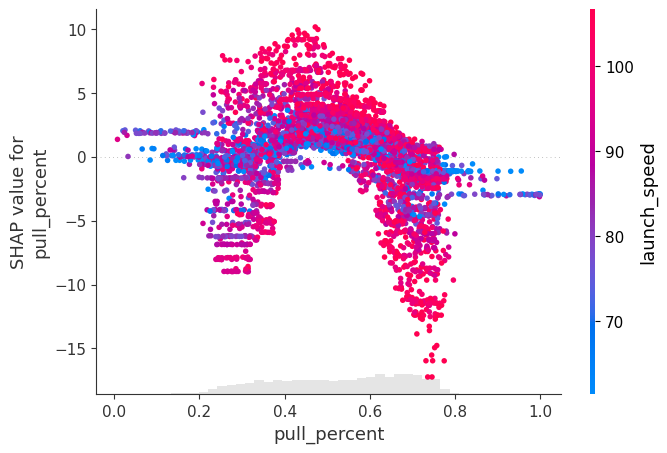

In [9]:
shap.plots.scatter(shap_values[:, 'pull_percent'], color = shap_values[:, 'launch_speed'])

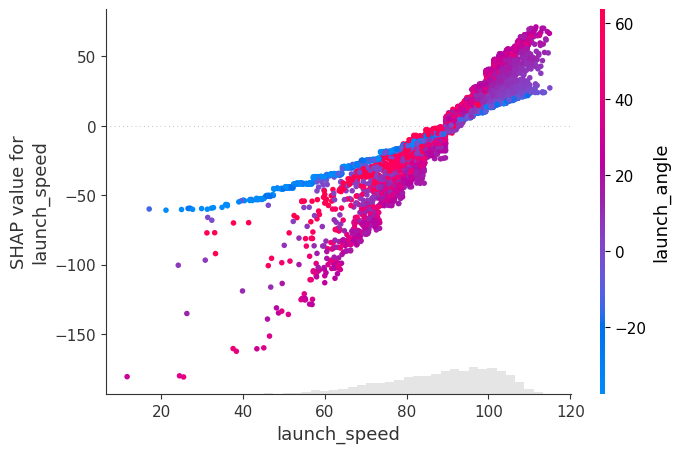

In [10]:
shap.plots.scatter(shap_values[:, 'launch_speed'], color = shap_values[:, 'launch_angle'])

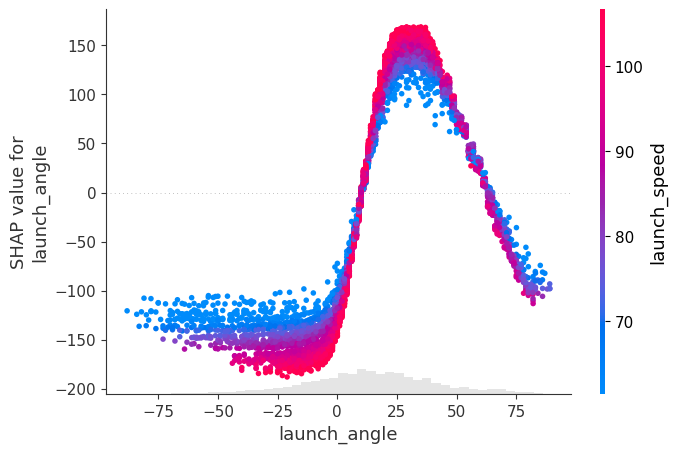

In [11]:
shap.plots.scatter(shap_values[:, 'launch_angle'], color = shap_values[:, 'launch_speed'])

**Beeswarm Plot**

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


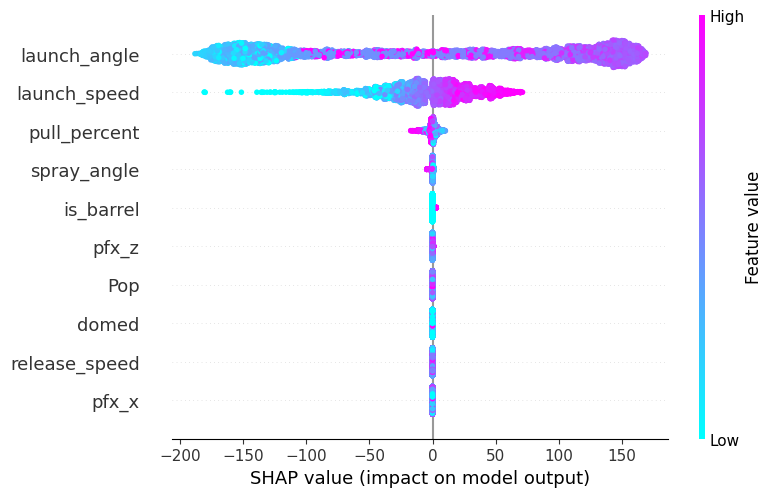

In [12]:
shap_values = explainer(X_valid)

shap.plots.beeswarm(shap_values, color='cool')

**Summary Plot**

[18:16:46] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "XGB__learning_rate" } are not used.



No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


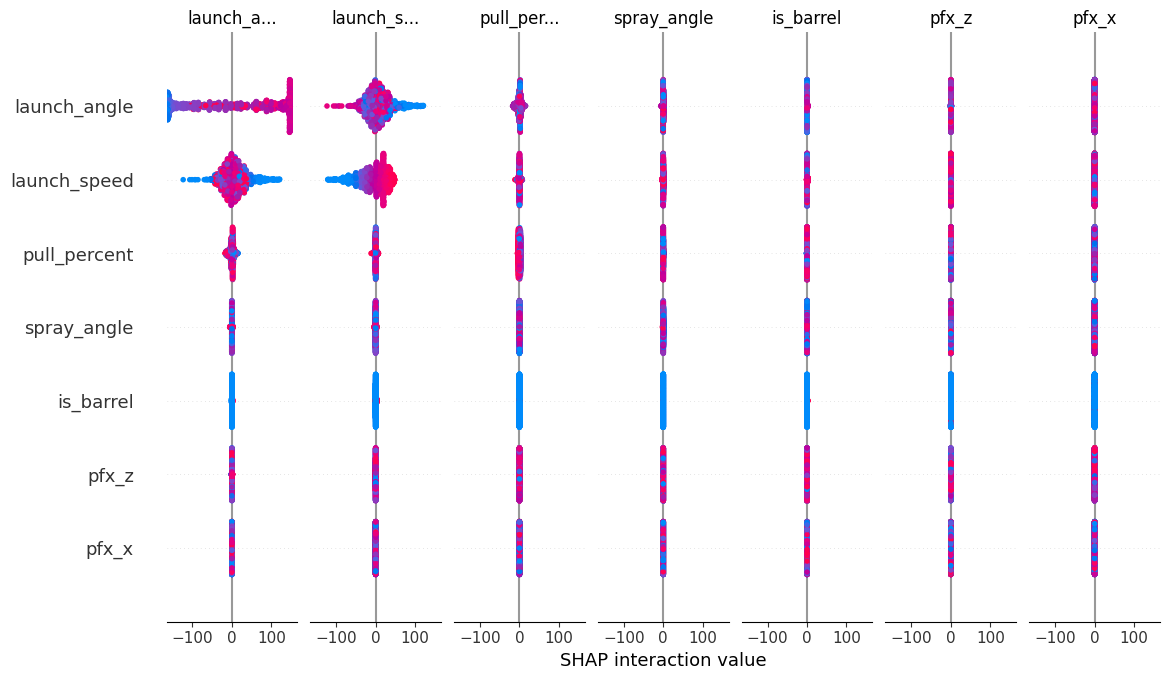

In [13]:

ter_xg = XGBRegressor(XGB__learning_rate=0.1, max_depth=5, min_child_weight = 1, subsample = 1.0, n_estimators=10).fit(X_train, y_train.values.ravel())

shap_interaction_values = shap.TreeExplainer(ter_xg).shap_interaction_values(X_train.iloc[:2000,:])

shap.summary_plot(shap_interaction_values, X_train.iloc[:2000,:])


**Decision Plot**

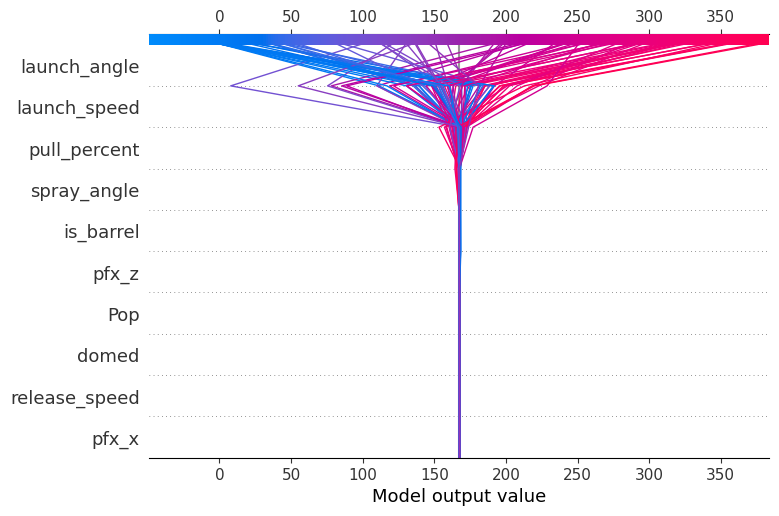

In [14]:
feat_names = X_valid.columns.to_numpy()

shap.decision_plot(explainer.expected_value, explainer.shap_values(X_valid)[:88], feat_names)

**Force Plot**

In [15]:
shap.plots.force(shap_values[:88])